In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [2]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "Decidua_Object_Train_Val_Small_Nuclei" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (6, 1024, 1024, 6) & y.shape: (6, 1024, 1024, 1)


In [3]:
hist = np.load('/data/models/20190808_decidua_small_nuclei/Decidua_Object_Train_Small_Nuclei_new_npz_81_rf_256_dense_64_conv_401k.npz')

In [4]:
hist['loss_history'].tolist()['acc']
hist['loss_history']

array({'acc': [0.6929069415268825, 0.7176714541123211, 0.7287325502901794, 0.7361601001103243, 0.7424815403118967, 0.7471860666274056, 0.7511262854368198, 0.7540325528535821, 0.7565353038854757], 'loss': [0.630792184025976, 0.5822206364887559, 0.5609928469845507, 0.5458572068989369, 0.5342808652722256, 0.5250776848253782, 0.5179832346541514, 0.5121975376189765, 0.5072602628508223]},
      dtype=object)

In [3]:
MODEL_NAME = 'Decidua_Object_Train_Small_Nuclei_61_rf_256_dense_64_conv_500k' + '_epoch_01'
weights_path = os.path.join('/data/models/20190808_decidua_small_nuclei', 
                            MODEL_NAME + ".h5")

In [4]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=256,
    n_conv_filters=64,
    dilated=True,
    n_features=3,
    norm_method='std',
    receptive_field=61,
    n_channels=3,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [5]:
test_images = run_sample_model.predict(X[0:1, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (1, 1024, 1024, 3)


In [6]:
np.save('/data/models/20190808_decidua_small_nuclei/' + MODEL_NAME + '_metrics', test_images)

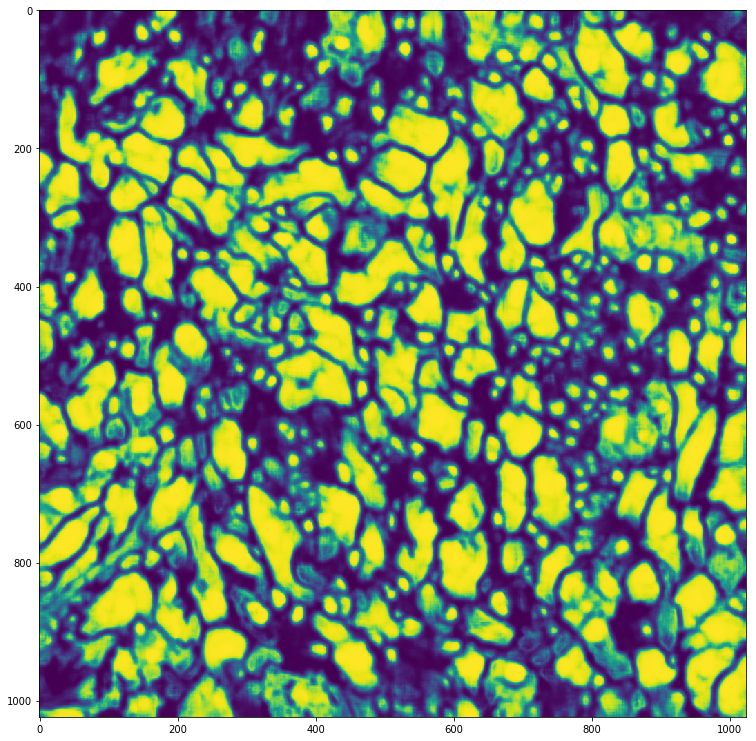

In [7]:
plt.figure(figsize = (13, 13))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
plt.imshow(test_images[0, :, :, 1])
#plt.imshow(X[0, :, :, 5])

#plt.imshow(y[1, :, :, 0])
#plt.imshow(test_images[3, :, :, 1])
#plt.imshow(test_images[3, :, :, 0] + test_images[3, :, :, 1])



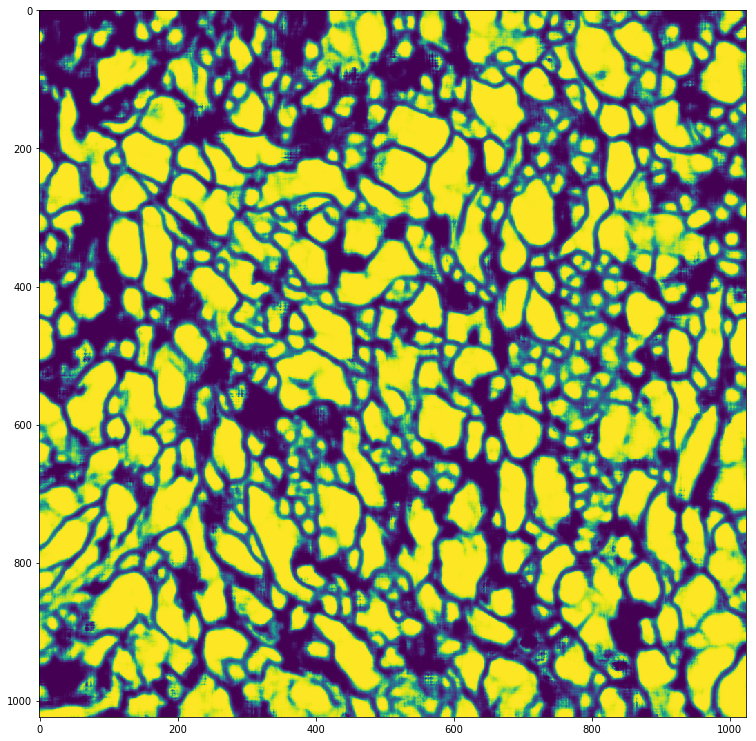

In [27]:
plt.figure(figsize = (13, 13))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
plt.imshow(test_images[0, :, :, 1])